In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
pd.read_csv?

In [86]:
D = pd.read_csv("../data/feats/en_masc_crowdsourced.feats", sep="\t")

D['y_is_high'] = D.y_Ao_n == 1


Index(['i_id_s', 'i_labels_b', 'i_annotators_n', 'y_Ao_n', 'y_Class_s',
       'a_headfreq_n', 'a_targetfreq_n', 'b_headpos_s', 'b_posbigram_left_s',
       'b_posbigram_right_s', 'b_stemcoverage_n', 'b_targetpos_s',
       'c_content_proportion_n', 'c_context_b', 'c_maxidf_n', 'c_slength_n',
       'c_totalidf_n', 'd_distancetoroot_n', 'd_headdeprels_b',
       'd_headsdeps_n', 'd_linear_head_distance_n', 'd_targetdeps_n',
       'd_targetdepsrels_b', 'z_nlabels_n', 'z_sensentropy_n', 'y_is_high'],
      dtype='object')

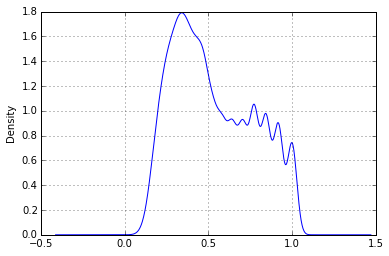

In [91]:
D.y_Ao_n.plot(kind='kde')

<generator object iterrows at 0x1079a0318>

In [120]:


#D.y_Class_s = np.array(list(map(str, D.y_Class_s)))
#D['y_is_high'] = [e == "HIGH" for e in D.y_Class_s ]
numeric_cols = [name for name in D.columns 
                if name.endswith("_n")
                if not name.startswith("i_")
                if name != 'b_stemcoverage_n'
               ]

bag_cols = [name for name in D.columns 
            if name.endswith("_b")
            if not name.startswith("i_")
            ]

# Explode bag columns
#for col in bag_cols:
    


In [116]:
s = D.d_headdeprels_b.str.split(" ").apply(lambda x: {k: 1 for k in x})
bags = pd.DataFrame(list(s.values), index=D.index).fillna(0)
bags.corrwith(D.y_Ao_n).order()

dobj           -0.025760
mark           -0.022701
punct          -0.015086
nmod:poss      -0.013625
det            -0.012569
xcomp          -0.011636
cop            -0.010721
conj           -0.009152
cc             -0.008569
acl:relcl      -0.008207
advmod         -0.007421
nsubj          -0.007290
nmod           -0.006777
appos          -0.005646
aux            -0.005048
expl           -0.004897
acl            -0.004770
compound:prt   -0.004578
csubjpass      -0.004194
dislocated     -0.004189
neg            -0.003237
compound       -0.003235
vocative       -0.003070
case           -0.002335
conj:preconj   -0.002252
dep            -0.001902
nmod:npmod     -0.001531
list           -0.000862
remnant         0.000742
det:predet      0.001048
amod            0.001335
advcl           0.001627
foreign         0.002217
parataxis       0.003534
goeswith        0.004156
name            0.004510
mwe             0.004587
csubj           0.005209
ccomp           0.006989
nummod          0.007620


In [97]:
D[numeric_cols].groupby(D.y_Class_s).mean().T

y_Class_s,HIGH,LOW,MID
y_Ao_n,0.841469,0.253745,0.477703
a_headfreq_n,0.113074,0.118401,0.112615
a_targetfreq_n,0.157447,0.165459,0.161176
c_content_proportion_n,0.464465,0.468516,0.463182
c_maxidf_n,11.858033,11.678163,11.764648
c_slength_n,35.255169,33.625445,33.953178
c_totalidf_n,153.785934,146.655973,147.905129
d_distancetoroot_n,3.108984,3.221490,3.029155
d_headsdeps_n,4.305620,4.118852,4.146030
d_linear_head_distance_n,8.028029,7.616714,8.310288


In [122]:
D[numeric_cols].corrwith(D.y_Ao_n)

y_Ao_n                      1.000000
a_headfreq_n               -0.021258
a_targetfreq_n             -0.100254
c_content_proportion_n     -0.008099
c_maxidf_n                  0.027793
c_slength_n                 0.028090
c_totalidf_n                0.026804
d_distancetoroot_n         -0.020797
d_headsdeps_n               0.032104
d_linear_head_distance_n    0.020005
d_targetdeps_n             -0.093036
z_nlabels_n                -0.209470
z_sensentropy_n            -0.328873
dtype: float64

In [126]:
print(D[numeric_cols].groupby(D.y_Class_s).mean().T[['LOW', 'MID', 'HIGH']].to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>y_Class_s</th>
      <th>LOW</th>
      <th>MID</th>
      <th>HIGH</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>y_Ao_n</th>
      <td>0.253745</td>
      <td>0.477703</td>
      <td>0.841469</td>
    </tr>
    <tr>
      <th>a_headfreq_n</th>
      <td>0.118401</td>
      <td>0.112615</td>
      <td>0.113074</td>
    </tr>
    <tr>
      <th>a_targetfreq_n</th>
      <td>0.165459</td>
      <td>0.161176</td>
      <td>0.157447</td>
    </tr>
    <tr>
      <th>c_content_proportion_n</th>
      <td>0.468516</td>
      <td>0.463182</td>
      <td>0.464465</td>
    </tr>
    <tr>
      <th>c_maxidf_n</th>
      <td>11.678163</td>
      <td>11.764648</td>
      <td>11.858033</td>
    </tr>
    <tr>
      <th>c_slength_n</th>
      <td>33.625445</td>
      <td>33.953178</td>
      <td>35.255169</td>
    </tr>
    <tr>
      <th>c_totalidf_n</th>
      <td>146.655973</td>
      <td>147.905